<a href="https://colab.research.google.com/github/mrparamvir/Distracted-Driver-Multi-Action-Classification/blob/main/Distracted_Driver_Multi_Action_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🚗Distracted Driver MultiAction Classification
This notebook builds an end-to-end multi class multi label prediction for stack overflow questions.

## 1. Problem

Our goal is to predict the likelihood of what the driver is doing in each picture.

We need to classify images into these 10 classes 

* c0: safe driving
* c1: texting - right
* c2: talking on the phone - right
* c3: texting - left
* c4: talking on the phone - left
* c5: operating the radio
* c6: drinking
* c7: reaching behind
* c8: hair and makeup
* c9: talking to passenger

## 2. Data

The data we're using is from Kaggle's State Farm Distracted Driver Detection.

https://www.kaggle.com/c/state-farm-distracted-driver-detection/data


## 3. Features

**Some information about the data:**

In this competition we are given driver images, each taken in a car with a driver doing something in the car (texting, eating, talking on the phone, makeup, reaching behind, etc). 

#### This is organized as three tables:


* **imgs.zip** - zipped folder of all (train/test) images.
* **sample_submission.csv** - a sample submission file in the correct format.
* **driver_imgs_list.csv** - a list of training images, their subject (driver) id, and class id.

In [1]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2021-02-10 15:53:24--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2021-02-10 15:53:24--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb9589abb1a98a3e9576527634f.dl.dropboxusercontent.com/cd/0/inline/BIqGFixNJpUg4B9IvzaMXqsh_GEo12DCeD5hy7nHjWnmIdrS40abz0x_us3x9D5lRo9Y40frslbHd6cgD7E3UsbD_I2gitD3zCbDZMJRn6cgIw/file# [following]
--2021-02-10 15:53:25--  https://ucb9589abb1a98a3e9576527634f.dl.dropboxusercontent.com/cd/0/inline/BIqGFixNJpUg4B9IvzaMXqsh_GEo12DCeD5hy7n

In [2]:
import numpy as np 
import pandas as pd 
import random

!unzip /content/state-farm-distracted-driver-detection.zip

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [95]:
# !unzip /content/imgs.zip

In [4]:
directory = '/content/train'
test_directory = '/content/test'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [5]:
img_size = 240

In [6]:
import cv2
import matplotlib.pyplot as plt

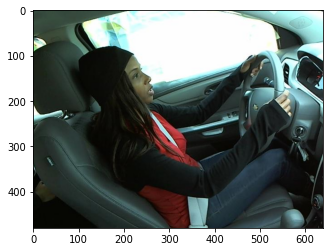

In [7]:
import os
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
        break
    break

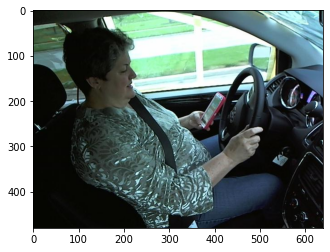

In [8]:
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    test_array = RGB_img
    plt.imshow(RGB_img)
    plt.show()
    break

In [9]:
print(img_array.shape)

(480, 640, 3)


(240, 240, 3)


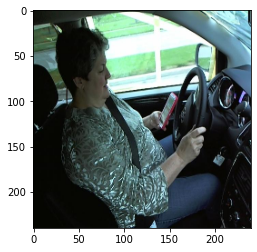

In [10]:
new_img = cv2.resize(test_array,(img_size,img_size))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [11]:
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img = cv2.resize(RGB_img,(img_size,img_size))
            training_data.append([new_img,class_num])

In [12]:
create_training_data()

In [13]:
print(img_array.shape)

(480, 640, 3)


(240, 240, 3)


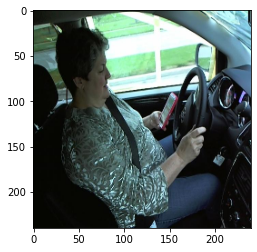

In [14]:
new_img = cv2.resize(test_array,(img_size,img_size))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [15]:
import random
random.shuffle(training_data)
x = []
y = []

In [16]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [17]:
x = x[:2242]
y = y[:2242]

In [18]:
len(x),len(y)

(2242, 2242)

In [19]:
x[0].shape

(240, 240, 3)

In [20]:
len(x)

2242

In [21]:
import numpy as np 
import pandas as pd 
x = np.array(x).reshape(-1,img_size,img_size,3)
x[0].shape

(240, 240, 3)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=96)

In [23]:
del x,y

In [24]:
import gc
gc.collect()

0

In [25]:
!pip install keras-utils
import keras
import keras_utils

  Created wheel for keras-utils: filename=keras_utils-1.0.13-cp36-none-any.whl size=2658 sha256=af0e6c824421b2006632eaa21066875f2bb4dd866e04c72d51e0d2febe54c4d7
  Stored in directory: /root/.cache/pip/wheels/46/25/27/7707005c1cb27e1ffc8277b004ac295e34767b02b44d73d6be
Successfully built keras-utils


In [26]:
from keras.utils import to_categorical

In [27]:
Y_train = to_categorical(y_train,num_classes=10)
Y_test = to_categorical(y_test,num_classes=10)

In [28]:
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [29]:
model = models.Sequential()
## CNN 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 64)      1

In [31]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callback = [callbacks.EarlyStopping(monitor='val_accuracy',patience=5)]
batch_size = 40
n_epochs = 10

In [32]:
results = model.fit(x_train,Y_train,
                    batch_size=batch_size,epochs=n_epochs,
                    verbose=1,
                    validation_data=(x_test,Y_test),
                    callbacks=callback)

Epoch 1/10
40/40 [==============================] - 33s 568ms/step - loss: 2.9370 - accuracy: 0.1514 - val_loss: 5.5278 - val_accuracy: 0.1456
Epoch 2/10
40/40 [==============================] - 20s 497ms/step - loss: 1.6139 - accuracy: 0.4573 - val_loss: 2.4129 - val_accuracy: 0.3432
Epoch 3/10
40/40 [==============================] - 20s 496ms/step - loss: 1.1042 - accuracy: 0.6199 - val_loss: 1.6242 - val_accuracy: 0.4651
Epoch 4/10
40/40 [==============================] - 20s 496ms/step - loss: 0.6584 - accuracy: 0.7961 - val_loss: 0.5350 - val_accuracy: 0.8291
Epoch 5/10
40/40 [==============================] - 20s 497ms/step - loss: 0.3553 - accuracy: 0.8880 - val_loss: 0.4406 - val_accuracy: 0.8559
Epoch 6/10
40/40 [==============================] - 20s 496ms/step - loss: 0.2614 - accuracy: 0.9236 - val_loss: 0.3772 - val_accuracy: 0.8663
Epoch 7/10
40/40 [==============================] - 20s 495ms/step - loss: 0.1737 - accuracy: 0.9453 - val_loss: 0.2381 - val_accuracy: 0.9257

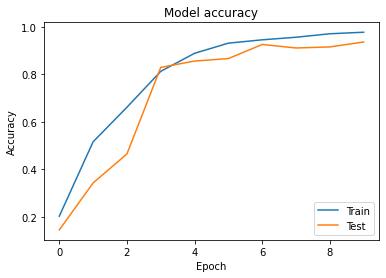

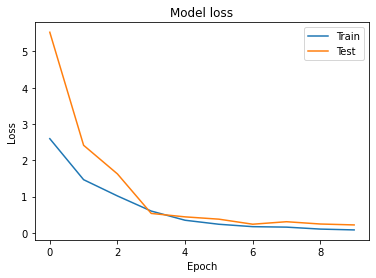

In [33]:
# Plot training & validation accuracy values
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [34]:
pred= model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        70
           1       1.00      0.98      0.99        60
           2       0.97      0.89      0.93        66
           3       0.93      0.99      0.96        67
           4       0.93      0.95      0.94        88
           5       0.95      0.99      0.97        71
           6       1.00      0.92      0.96        75
           7       0.91      0.96      0.94        53
           8       0.81      0.92      0.86        52
           9       0.93      0.90      0.91        71

    accuracy                           0.94       673
   macro avg       0.94      0.94      0.93       673
weighted avg       0.94      0.94      0.94       673



In [36]:
model.save_weights('./driverdistraction_lr_weights.h5', overwrite=True)

In [51]:
model.save('./driverdistraction.h5')

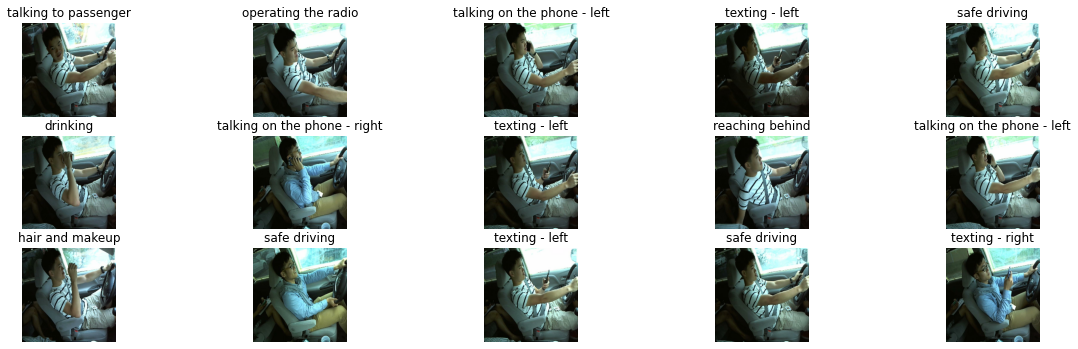

In [94]:
# let's visualize the data